<a href="https://colab.research.google.com/github/tigerak/1st_practice/blob/main/M4_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN
- 분류와 회구 모두 지원

In [1]:
import pandas as pd
import numpy as np
import multiprocessing
import matplotlib.pyplot as plt

In [2]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.manifold import TSNE

from sklearn.datasets import load_iris, load_breast_cancer, load_boston, load_wine, fetch_california_housing

# KNN Class

## IRIS

In [18]:
iris = load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['Target'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [32]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

model = KNeighborsClassifier()
model.fit(X_train, y_train)

print('Train Data Score : {}'.format(model.score(X_train, y_train)))
print('Test Data Score : {}'.format(model.score(X_test, y_test)))

model.fit(X_train_scaler, y_train)

print('Train Scaler Data Score : {}'.format(model.score(X_train_scaler, y_train)))
print('Test Scaler Data Score : {}'.format(model.score(X_test_scaler, y_test)))

Train Data Score : 0.975
Test Data Score : 0.9666666666666667
Train Scaler Data Score : 0.9583333333333334
Test Scaler Data Score : 0.9666666666666667


In [33]:
cross_validate(estimator=KNeighborsClassifier(), X=X, y=y, cv=5, \
               n_jobs=multiprocessing.cpu_count(), verbose=True)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.8s finished


{'fit_time': array([0.00095558, 0.00090718, 0.00078011, 0.00069118, 0.00078154]),
 'score_time': array([0.0037744 , 0.00382519, 0.00333858, 0.00330877, 0.0018332 ]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])}

In [23]:
param_grid = [{'n_neighbors':[3, 5, 7], 
               'weights':['uniform', 'distance'], 
               'algorithm':['ball_tree', 'kd_tree', 'brute']
               }]

gs = GridSearchCV(
    estimator = KNeighborsClassifier(),
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    verbose = True
)

gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  90 out of  90 | elapsed:    1.2s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=2,
             param_grid=[{'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'n_neighbors': [3, 5, 7],
                          'weights': ['uniform', 'distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

In [26]:
print(gs.best_estimator_)
print('GridSearchCV Best Param : {}'.format(gs.best_params_))
print('GridSearchCV Best Score : {}'.format(gs.best_score_))

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')
GridSearchCV Best Param : {'algorithm': 'ball_tree', 'n_neighbors': 7, 'weights': 'uniform'}
GridSearchCV Best Score : 0.9800000000000001


In [27]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    return xx, yy

def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)

    return out

In [29]:
tsne = TSNE(n_components=2) # 차원 축소
X_comp = tsne.fit_transform(X)

iris_comp_df = pd.DataFrame(data=X_comp)
iris_comp_df['Target'] = y
iris_comp_df
# n_components가 2이기 때문에 2개의 피처로만 줄여서 나타남남남

,0,1,Target
0,-21.621592,13.136946,0
1,-24.202082,14.205690,0
2,-24.048746,13.022339,0
3,-24.506535,13.414201,0
4,-21.612715,12.720779,0
...,...,...,...
145,17.605099,-3.740910,2
146,14.396360,-2.862009,2
147,16.645206,-3.499099,2
148,18.021521,-1.858407,2


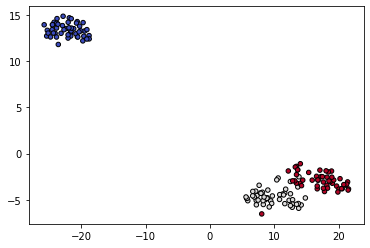

In [30]:
plt.scatter(X_comp[:, 0], X_comp[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [35]:
model = KNeighborsClassifier()
model.fit(X_comp, y)
predict = model.predict(X_comp)

print('X_comp Data Score : {}'.format(model.score(X_comp, y)))

X_comp Data Score : 0.9733333333333334


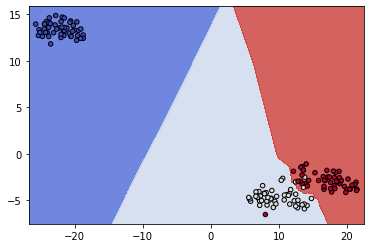

In [33]:
xx, yy = make_meshgrid(X_comp[:, 0], X_comp[:, 1])
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_comp[:, 0], X_comp[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

## 유방암

In [3]:
cancer = load_breast_cancer()

cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
cancer_df['Target'] = cancer.target
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [31]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

model = KNeighborsClassifier()
model.fit(X_train, y_train)

print('Train Data Score : {}'.format(model.score(X_train, y_train)))
print('Test Data Score : {}'.format(model.score(X_test, y_test)))

model.fit(X_train_scaler, y_train)

print('Train Scaler Data Score : {}'.format(model.score(X_train_scaler, y_train)))
print('Test Scaler Data Score : {}'.format(model.score(X_test_scaler, y_test)))

Train Data Score : 0.9428571428571428
Test Data Score : 0.956140350877193
Train Scaler Data Score : 0.9802197802197802
Test Scaler Data Score : 0.9912280701754386


In [9]:
estimator = make_pipeline(StandardScaler(),
                          KNeighborsClassifier()
                          )

cross_validate(estimator=estimator, X=X, y=y, cv=5, \
               n_jobs=multiprocessing.cpu_count(), verbose=True)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished


{'fit_time': array([0.00313568, 0.00291538, 0.00298858, 0.00278306, 0.00294662]),
 'score_time': array([0.01072121, 0.01354599, 0.01108527, 0.01173472, 0.00742793]),
 'test_score': array([0.96491228, 0.95614035, 0.98245614, 0.95614035, 0.96460177])}

In [10]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', KNeighborsClassifier())
                 ])

param_grid = [{'model__n_neighbors':[3, 5, 7], 
               'model__weights':['uniform', 'distance'], 
               'model__algorithm':['ball_tree', 'kd_tree', 'brute']
               }]

gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    verbose = True
)

gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  90 out of  90 | elapsed:    0.6s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=5, p=2,
                                                             weights='uniform'))],
                                verbose=False),
      

In [11]:
print(gs.best_estimator_)
print('GridSearchCV Best Param : {}'.format(gs.best_params_))
print('GridSearchCV Best Score : {}'.format(gs.best_score_))

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 KNeighborsClassifier(algorithm='ball_tree', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=7, p=2,
                                      weights='uniform'))],
         verbose=False)
GridSearchCV Best Param : {'model__algorithm': 'ball_tree', 'model__n_neighbors': 7, 'model__weights': 'uniform'}
GridSearchCV Best Score : 0.9701288619779538


In [12]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    return xx, yy

def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)

    return out

In [13]:
tsne = TSNE(n_components=2)
X_comp = tsne.fit_transform(X)

cancer_comp_df = pd.DataFrame(data=X_comp)
cancer_comp_df['Target'] = y
cancer_comp_df
# n_components가 2이기 때문에 2개의 피처로만 줄여서 나타남남남

,0,1,Target
0,-49.015537,-3.493600,0
1,-47.349052,-1.328021,0
2,-43.398270,-4.586261,0
3,22.714645,7.319111,0
4,-41.147572,-3.597137,0
...,...,...,...
564,-48.427364,0.118567,0
565,-43.812622,-3.485841,0
566,-26.145473,-8.666089,0
567,-45.601509,-2.991527,0


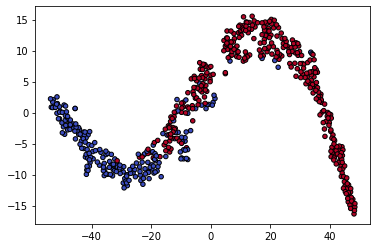

In [14]:
plt.scatter(X_comp[:, 0], X_comp[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [15]:
model = KNeighborsClassifier()
model.fit(X_comp, y)
predict = model.predict(X_comp)

print('X_comp Data Score : {}'.format(model.score(X_comp, y)))

X_comp Data Score : 0.945518453427065


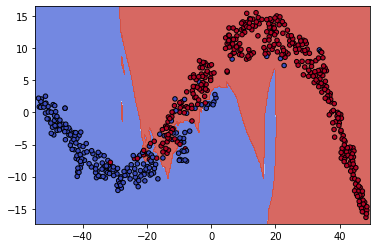

In [16]:
xx, yy = make_meshgrid(X_comp[:, 0], X_comp[:, 1])
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_comp[:, 0], X_comp[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

## wine

In [34]:
wine = load_wine()

wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df['Target'] = wine.target
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [43]:
X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

model = KNeighborsClassifier()
model.fit(X_train, y_train)

print('Train Data Score : {}'.format(model.score(X_train, y_train)))
print('Test Data Score : {}'.format(model.score(X_test, y_test)))

model.fit(X_train_scaler, y_train)

print('Train Scaler Data Score : {}'.format(model.score(X_train_scaler, y_train)))
print('Test Scaler Data Score : {}'.format(model.score(X_test_scaler, y_test)))

Train Data Score : 0.795774647887324
Test Data Score : 0.6944444444444444
Train Scaler Data Score : 0.9859154929577465
Test Scaler Data Score : 0.9722222222222222


In [44]:
estimator = make_pipeline(StandardScaler(),
                          KNeighborsClassifier()
                          )

cross_validate(estimator=estimator, X=X, y=y, cv=5, \
               n_jobs=multiprocessing.cpu_count(), verbose=True)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.8s finished


{'fit_time': array([0.00225067, 0.00212002, 0.00183773, 0.00173903, 0.00207138]),
 'score_time': array([0.00385237, 0.00334144, 0.00348091, 0.00331211, 0.00216103]),
 'test_score': array([0.94444444, 0.94444444, 0.97222222, 1.        , 0.88571429])}

In [45]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', KNeighborsClassifier())
                 ])

param_grid = [{'model__n_neighbors':[3, 5, 7], 
               'model__weights':['uniform', 'distance'], 
               'model__algorithm':['ball_tree', 'kd_tree', 'brute']
               }]

gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    verbose = True
)

gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  90 out of  90 | elapsed:    0.3s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=5, p=2,
                                                             weights='uniform'))],
                                verbose=False),
      

In [46]:
print(gs.best_estimator_)
print('GridSearchCV Best Param : {}'.format(gs.best_params_))
print('GridSearchCV Best Score : {}'.format(gs.best_score_))

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 KNeighborsClassifier(algorithm='ball_tree', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=7, p=2,
                                      weights='uniform'))],
         verbose=False)
GridSearchCV Best Param : {'model__algorithm': 'ball_tree', 'model__n_neighbors': 7, 'model__weights': 'uniform'}
GridSearchCV Best Score : 0.9665079365079364


In [47]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    return xx, yy

def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)

    return out

In [48]:
tsne = TSNE(n_components=2)
X_comp = tsne.fit_transform(X)

wine_comp_df = pd.DataFrame(data=X_comp)
wine_comp_df['Target'] = y
wine_comp_df

,0,1,Target
0,10.150143,-5.529000,0
1,10.255416,-4.704883,0
2,12.273735,-6.336147,0
3,14.704717,-7.917504,0
4,3.172760,-0.177841,0
...,...,...,...
173,2.912434,-0.523875,2
174,3.301081,-0.735936,2
175,5.593929,-2.022064,2
176,5.619462,-2.296010,2


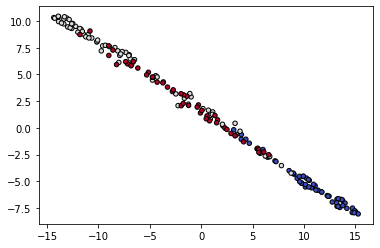

In [49]:
plt.scatter(X_comp[:, 0], X_comp[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [50]:
model = KNeighborsClassifier()
model.fit(X_comp, y)
predict = model.predict(X_comp)

print('X_comp Data Score : {}'.format(model.score(X_comp, y)))

X_comp Data Score : 0.7921348314606742


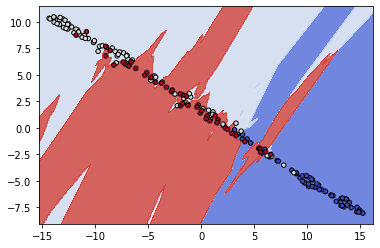

In [51]:
xx, yy = make_meshgrid(X_comp[:, 0], X_comp[:, 1])
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_comp[:, 0], X_comp[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

# KNN 회귀

- 이웃 데이터 포인트의 평균이 예측결과

## 보스턴

In [52]:
boston = load_boston()

boston_df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
boston_df['Target'] = boston.target
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [59]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

model = KNeighborsRegressor()

model.fit(X_train, y_train)
print('Train Data Score : {}'.format(model.score(X_train, y_train)))
print('Test Data Score : {}'.format(model.score(X_test, y_test)))

model.fit(X_train_scaler, y_train)
print('Train Scaler Data Score : {}'.format(model.score(X_train_scaler, y_train)))
print('Test Scaler Data Score : {}'.format(model.score(X_test_scaler, y_test)))

Train Data Score : 0.658800594443983
Test Data Score : 0.6577424047196629
Train Scaler Data Score : 0.831625632135519
Test Scaler Data Score : 0.8204633198211807


In [60]:
estimator = make_pipeline(StandardScaler(),
                          KNeighborsRegressor()
                          )

cross_validate(estimator=estimator, X=X, y=y, cv=5, \
               n_jobs=multiprocessing.cpu_count(), verbose=True)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.8s finished


{'fit_time': array([0.00247622, 0.0017004 , 0.00224257, 0.00489283, 0.00209069]),
 'score_time': array([0.00336838, 0.0020268 , 0.00303578, 0.00316453, 0.00248623]),
 'test_score': array([0.56089547, 0.61917359, 0.48661916, 0.46986886, 0.23133037])}

In [61]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', KNeighborsRegressor())
                 ])

param_grid = [{'model__n_neighbors':[3, 5, 7], 
               'model__weights':['uniform', 'distance'], 
               'model__algorithm':['ball_tree', 'kd_tree', 'brute']
               }]

gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    verbose = True
)

gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  90 out of  90 | elapsed:    0.4s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        KNeighborsRegressor(algorithm='auto',
                                                            leaf_size=30,
                                                            metric='minkowski',
                                                            metric_params=None,
                                                            n_jobs=None,
                                                            n_neighbors=5, p=2,
                                                            weights='uniform'))],
                                verbose=False),
             

In [62]:
print(gs.best_estimator_)
print('GridSearchCV Best Param : {}'.format(gs.best_params_))
print('GridSearchCV Best Score : {}'.format(gs.best_score_))

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 KNeighborsRegressor(algorithm='ball_tree', leaf_size=30,
                                     metric='minkowski', metric_params=None,
                                     n_jobs=None, n_neighbors=7, p=2,
                                     weights='distance'))],
         verbose=False)
GridSearchCV Best Param : {'model__algorithm': 'ball_tree', 'model__n_neighbors': 7, 'model__weights': 'distance'}
GridSearchCV Best Score : 0.4973060611762845


In [63]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    return xx, yy

def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)

    return out

In [69]:
tsne = TSNE(n_components=1) # Regress니까 1
X_comp = tsne.fit_transform(X)

boston_comp_df = pd.DataFrame(data=X_comp)
boston_comp_df['Target'] = y
boston_comp_df

,0,Target
0,20.137781,24.0
1,41.197289,21.6
2,41.970226,34.7
3,43.411575,33.4
4,43.568806,36.2
...,...,...
501,27.677170,22.4
502,28.334272,20.6
503,29.127419,23.9
504,29.082230,22.0


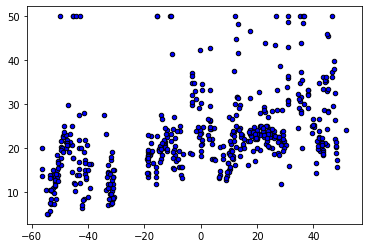

In [70]:
plt.scatter(X_comp, y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [72]:
model = KNeighborsRegressor()
model.fit(X_comp, y)
predict = model.predict(X_comp)

print('X_comp Data Score : {}'.format(model.score(X_comp, y)))

X_comp Data Score : 0.6008774114338278


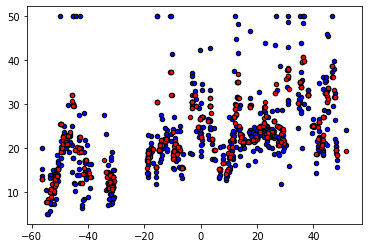

In [74]:
plt.scatter(X_comp, y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.scatter(X_comp, predict, c='r', cmap=plt.cm.coolwarm, s=20, edgecolors='k')

## 캘리포니아 주택

In [3]:
california = fetch_california_housing()

california_df = pd.DataFrame(data=california.data, columns=california.feature_names)
california_df['Target'] = california.target
california_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [4]:
X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

model = KNeighborsRegressor()

model.fit(X_train, y_train)
print('Train Data Score : {}'.format(model.score(X_train, y_train)))
print('Test Data Score : {}'.format(model.score(X_test, y_test)))

model.fit(X_train_scaler, y_train)
print('Train Scaler Data Score : {}'.format(model.score(X_train_scaler, y_train)))
print('Test Scaler Data Score : {}'.format(model.score(X_test_scaler, y_test)))

Train Data Score : 0.4515812879048356
Test Data Score : 0.14622681913754443
Train Scaler Data Score : 0.7908152981711026
Test Scaler Data Score : 0.6996959679143278


In [5]:
estimator = make_pipeline(StandardScaler(),
                          KNeighborsRegressor()
                          )

cross_validate(estimator=estimator, X=X, y=y, cv=5, \
               n_jobs=multiprocessing.cpu_count(), verbose=True)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    2.5s finished


{'fit_time': array([0.03825951, 0.04251409, 0.03555465, 0.03557491, 0.03557849]),
 'score_time': array([0.55153847, 0.45753932, 0.48704219, 0.5921905 , 0.37442207]),
 'test_score': array([0.47879396, 0.4760079 , 0.57624554, 0.50259828, 0.57228584])}

In [6]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', KNeighborsRegressor())
                 ])

param_grid = [{'model__n_neighbors':[3, 5, 7], 
               'model__weights':['uniform', 'distance'], 
               'model__algorithm':['ball_tree', 'kd_tree', 'brute']
               }]

gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    verbose = True
)

gs.fit(X, y)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   23.0s
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=2)]: Done  90 out of  90 | elapsed:   58.3s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        KNeighborsRegressor(algorithm='auto',
                                                            leaf_size=30,
                                                            metric='minkowski',
                                                            metric_params=None,
                                                            n_jobs=None,
                                                            n_neighbors=5, p=2,
                                                            weights='uniform'))],
                                verbose=False),
             

In [7]:
print(gs.best_estimator_)
print('GridSearchCV Best Param : {}'.format(gs.best_params_))
print('GridSearchCV Best Score : {}'.format(gs.best_score_))

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 KNeighborsRegressor(algorithm='ball_tree', leaf_size=30,
                                     metric='minkowski', metric_params=None,
                                     n_jobs=None, n_neighbors=7, p=2,
                                     weights='distance'))],
         verbose=False)
GridSearchCV Best Param : {'model__algorithm': 'ball_tree', 'model__n_neighbors': 7, 'model__weights': 'distance'}
GridSearchCV Best Score : 0.5376515274379832


In [8]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    return xx, yy

def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)

    return out

In [9]:
tsne = TSNE(n_components=1) # Regress니까 1
X_comp = tsne.fit_transform(X)

boston_comp_df = pd.DataFrame(data=X_comp)
boston_comp_df['Target'] = y
boston_comp_df

,0,Target
0,59.096504,4.526
1,104.312851,3.585
2,-43.508629,3.521
3,-74.287880,3.413
4,-89.086006,3.422
...,...,...
20635,29.612574,0.781
20636,57.552303,0.771
20637,-55.194828,0.923
20638,40.846523,0.847


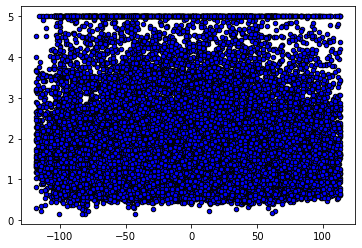

In [10]:
plt.scatter(X_comp, y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [11]:
model = KNeighborsRegressor()
model.fit(X_comp, y)
predict = model.predict(X_comp)

print('X_comp Data Score : {}'.format(model.score(X_comp, y)))

X_comp Data Score : 0.22250287882886954


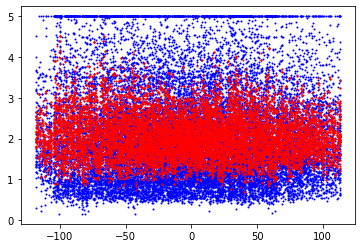

In [17]:
plt.scatter(X_comp, y, c='b', cmap=plt.cm.coolwarm, s=1)
plt.scatter(X_comp, predict, c='r', cmap=plt.cm.coolwarm, s=1)